In [136]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from datetime import datetime
sns.set()

In [20]:
filename = '~/Desktop/spring19/algotrading/data/5 Min/Stocks/aapl.us.txt'
data = pd.read_csv(filename)

In [43]:
data.head()

,Date,Time,Open,High,Low,Close,Volume,OpenInt
0,2017-11-17,15:35:00,171.04,171.05,170.25,170.3600,1808907,0
1,2017-11-17,15:40:00,170.36,170.41,170.06,170.0600,481179,0
2,2017-11-17,15:45:00,170.06,170.29,169.83,170.2500,580184,0
3,2017-11-17,15:50:00,170.26,170.28,169.97,169.9700,356061,0
4,2017-11-17,15:55:00,169.98,170.19,169.93,170.1432,405302,0


# VWAP

$$
VWAP(t) = \frac{\sum_i^t v_i p_i}{\sum_i^t v_i}
$$

In [109]:
c_tpv = 0 # cumulative typical price * volume
c_volume = 0 # cumulative volume
vwap = []

for index, row in data.iterrows():
    tp = (row.High + row.Low + row.Close)/3 # typical price
    c_tpv += tp * row.Volume # volume of trade w/ given close price
    c_volume += row.Volume
    vwap.append(c_tpv / c_volume)

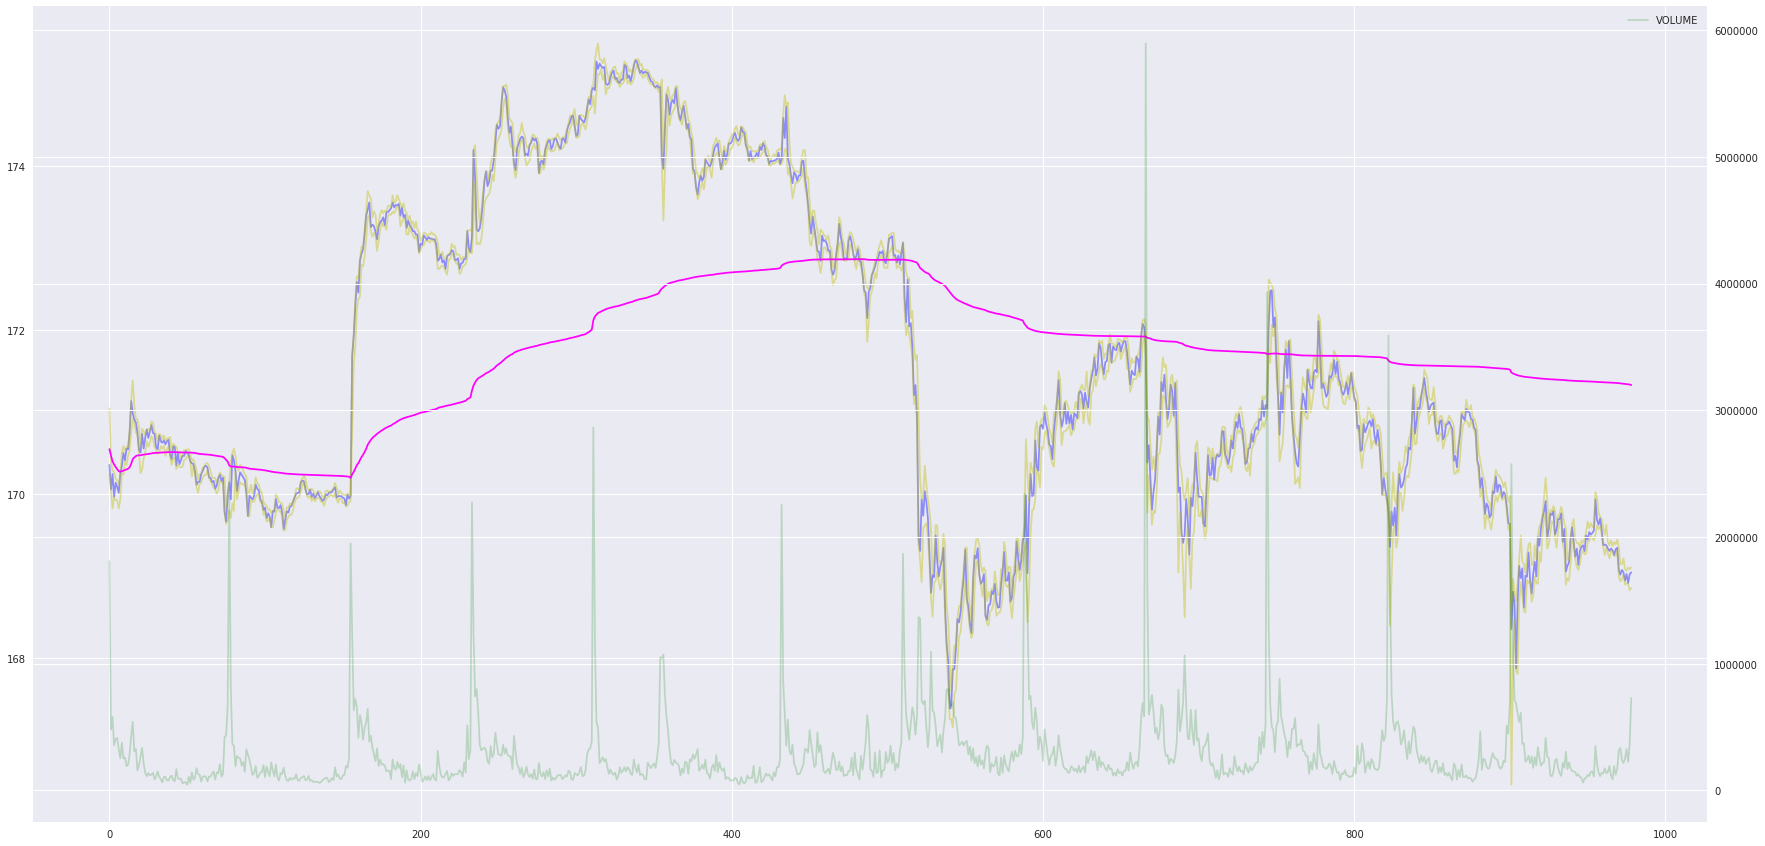

In [177]:
plt.plot(data.Close, alpha=0.4, c='b', label='CLOSE')
plt.plot(data.Low, alpha=0.4, c='y')
plt.plot(data.High, alpha=0.4, c='y')
plt.plot(vwap, c='magenta')

ax2 = plt.twinx()
ax2.plot(data.Volume, alpha=0.2, c='g', label='VOLUME')
ax2.legend()

# TWAP

$$
TWAP(t) = \frac{\sum_i^t p_i}{t}
$$

In [188]:
c_price = 0 # cumulative price
twap = []

for index, row in data.iterrows():
    tp = (row.High + row.Low + row.Close)/3
    c_price += tp
    twap.append(c_price/(index+1))

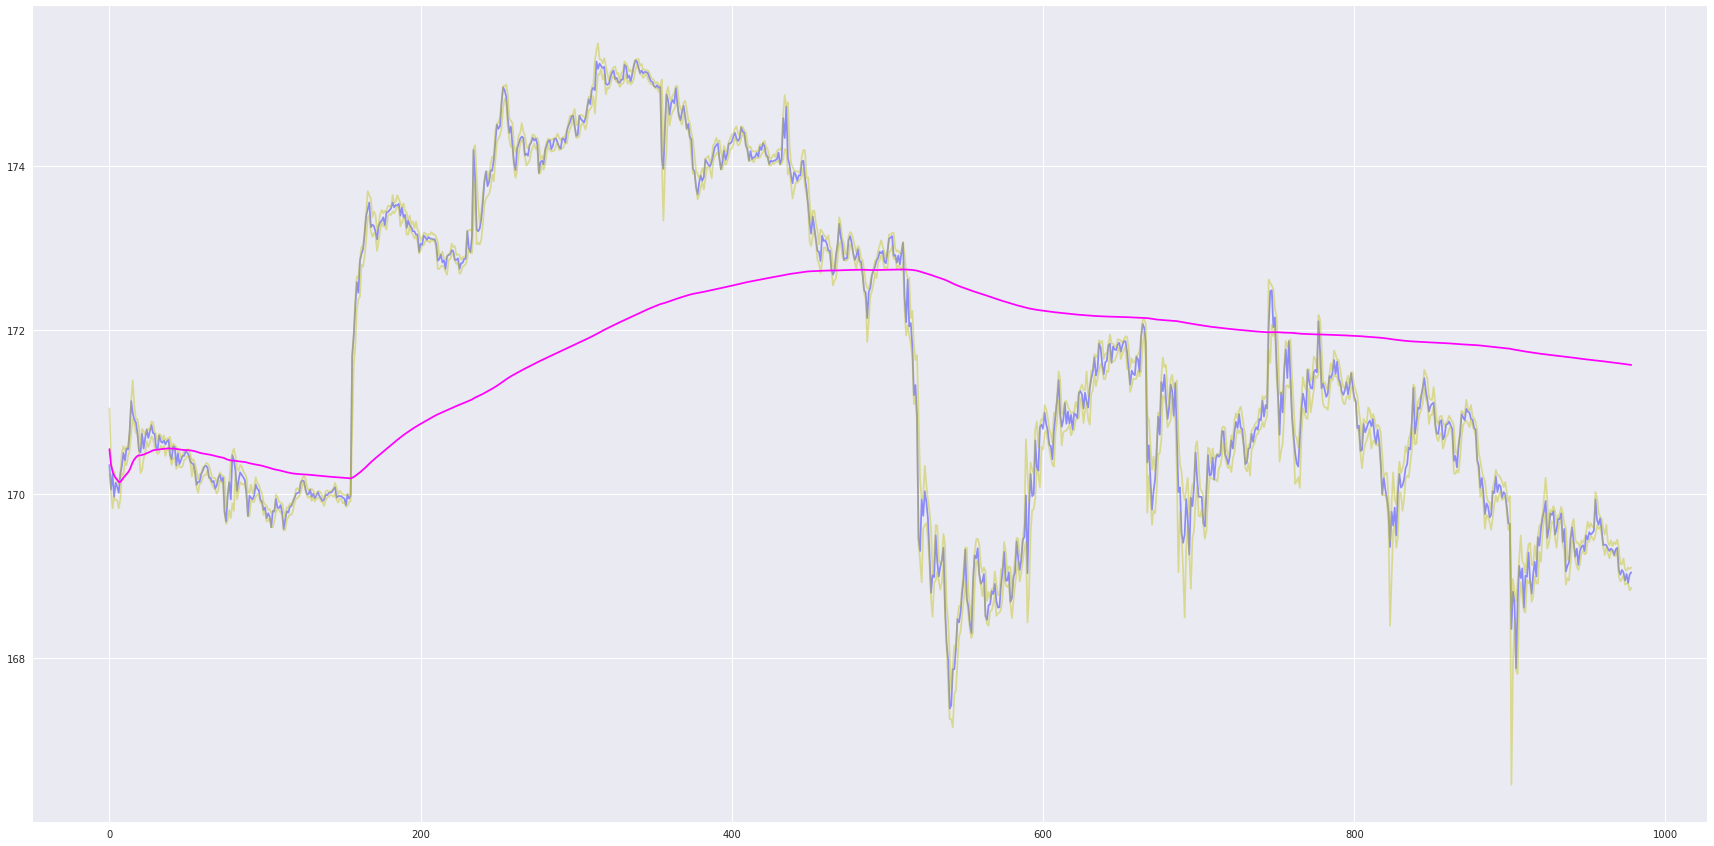

In [190]:
plt.plot(data.Close, alpha=0.4, c='b', label='CLOSE')
plt.plot(data.Low, alpha=0.4, c='y')
plt.plot(data.High, alpha=0.4, c='y')
plt.plot(twap, c='magenta')